<a href="https://colab.research.google.com/github/Ankit52790/Ankit52790/blob/main/spam_mail_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import numpy as np
import pandas as pd

In [180]:
df=pd.read_csv('/content/train.csv')

In [181]:
df.sample(5)

,sms,label
3421,"As a valued customer, I am pleased to advise y...",1
1985,Urgent! Please call 09061743810 from landline....,1
2480,Sppok up ur mob with a Halloween collection of...,1
5007,ILL B DOWN SOON\n,0
687,Every King Was Once A Crying Baby And Every Gr...,0


In [182]:
df.shape

(5574, 2)


1. data cleaning
2. EDA
3. text preprocessing
3. model building
4. Evolution
5. improvement
6.  website
7. deployment




In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [184]:
df.sample(5)

,sms,label
4758,"hey, looks like I was wrong and one of the kap...",0
4763,Me too! Have a lovely night xxx\n,0
1846,Hi. || Do u want | to join me with sts later? ...,0
4406,Dun need to use dial up juz open da browser n ...,0
1386,That's ok. I popped in to ask bout something a...,0


In [185]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [186]:
df['label']=encoder.fit_transform(df['label'])

In [187]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [188]:
# missing values
df.isnull().sum()

sms      0
label    0
dtype: int64

In [189]:
# check for duplicate values:
df.duplicated().sum()

403

In [190]:
df.shape

(5574, 2)

**2.EDA**

In [191]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [192]:
df['label'].value_counts()

0    4827
1     747
Name: label, dtype: int64

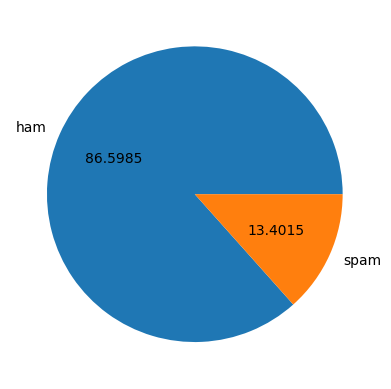

In [193]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.4f")
plt.show()

In [194]:
# data is inbalanced

In [195]:
import nltk

In [196]:
!pip install nltk

In [197]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [198]:
# number of character
df['sms'].apply(len)

0       112
1        30
2       156
3        50
4        62
       ... 
5569    161
5570     37
5571     58
5572    126
5573     27
Name: sms, Length: 5574, dtype: int64

In [199]:
# copy to another variable
df['num_characters']=df['sms'].apply(len)

In [200]:
df.head()

,sms,label,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [201]:
# num of word
df['sms'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5569    [This, is, the, 2nd, time, we, have, tried, 2,...
5570      [Will, ü, b, going, to, esplanade, fr, home, ?]
5571    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5572    [The, guy, did, some, bitching, but, I, acted,...
5573                  [Rofl, ., Its, true, to, its, name]
Name: sms, Length: 5574, dtype: object

In [202]:
# count length
df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5569    35
5570     9
5571    15
5572    27
5573     7
Name: sms, Length: 5574, dtype: int64

In [203]:
# copy this to another variable
df['num_words']=df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))


In [204]:
df.head()

,sms,label,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,112,24
1,Ok lar... Joking wif u oni...\n,0,30,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37
3,U dun say so early hor... U c already then say...,0,50,13
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15


In [239]:
# numbers of sentences
df['sms'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5569    [This is the 2nd time we have tried 2 contact ...
5570               [Will ü b going to esplanade fr home?]
5571    [Pity, * was in mood for that., So...any other...
5572    [The guy did some bitching but I acted like i'...
5573                        [Rofl., Its true to its name]
Name: sms, Length: 5574, dtype: object

In [206]:
# copy sentences to another variable
df['num_senteces']=df['sms'].apply(lambda x:nltk.sent_tokenize(x))

In [207]:
df.head()

,sms,label,num_characters,num_words,num_senteces
0,"Go until jurong point, crazy.. Available only ...",0,112,24,"[Go until jurong point, crazy.., Available onl..."
1,Ok lar... Joking wif u oni...\n,0,30,8,"[Ok lar..., Joking wif u oni...]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,U dun say so early hor... U c already then say...,0,50,13,[U dun say so early hor... U c already then sa...
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,"[Nah I don't think he goes to usf, he lives ar..."


In [208]:
df[['num_characters','num_words','num_senteces']].describe()

,num_characters,num_words
count,5574.000000,5574.000000
mean,81.478292,18.854324
std,59.848302,13.838509
min,3.000000,1.000000
25%,37.000000,9.000000
50%,63.000000,15.000000
75%,123.000000,27.000000
max,911.000000,220.000000


In [209]:
#Analysis ham
df[df['label']== 0][['num_characters','num_words','num_senteces']].describe()

,num_characters,num_words
count,4827.000000,4827.000000
mean,72.471929,17.439196
std,58.326643,14.104466
min,3.000000,1.000000
25%,34.000000,8.000000
50%,53.000000,13.000000
75%,94.000000,23.000000
max,911.000000,220.000000


In [210]:
#Analysis  spam
df[df['label']== 1][['num_characters','num_words','num_senteces']].describe()

,num_characters,num_words
count,747.000000,747.000000
mean,139.676037,27.998661
std,28.871250,6.855361
min,14.000000,2.000000
25%,134.000000,25.000000
50%,150.000000,29.000000
75%,158.000000,32.000000
max,224.000000,46.000000


In [211]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

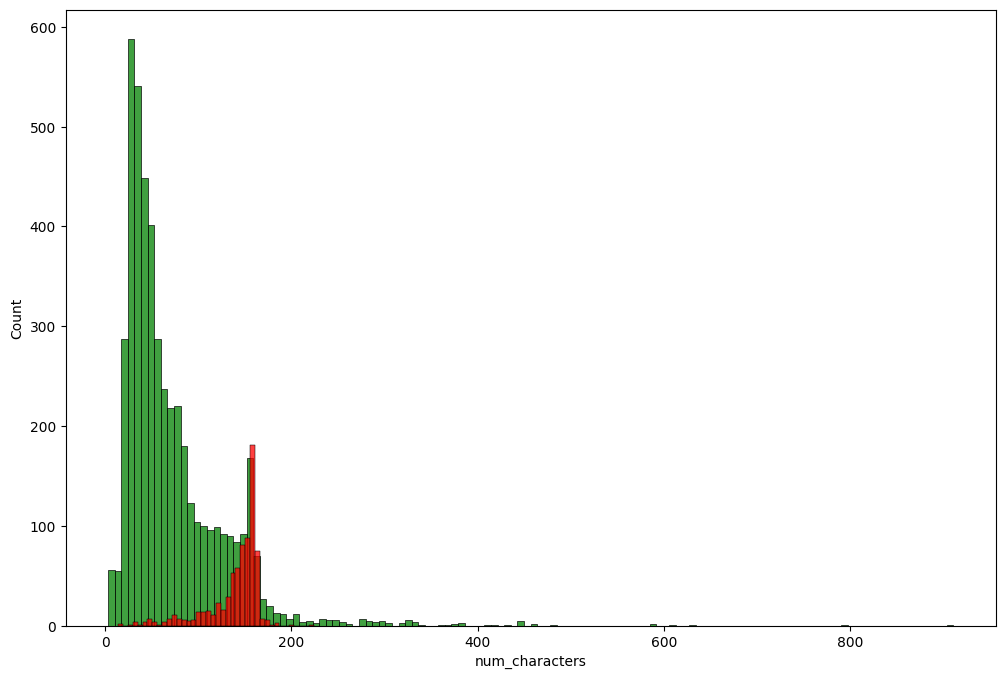

In [212]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label']== 0]['num_characters'],color='green')
sns.histplot(df[df['label']== 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

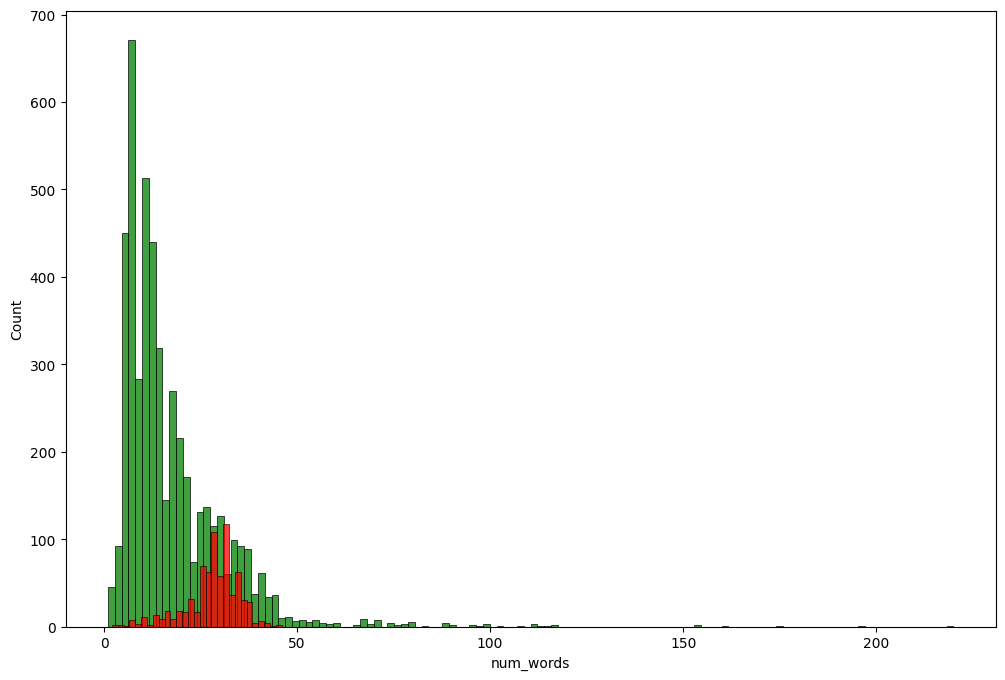

In [213]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label']== 0]['num_words'],color='green')
sns.histplot(df[df['label']== 1]['num_words'],color='red')

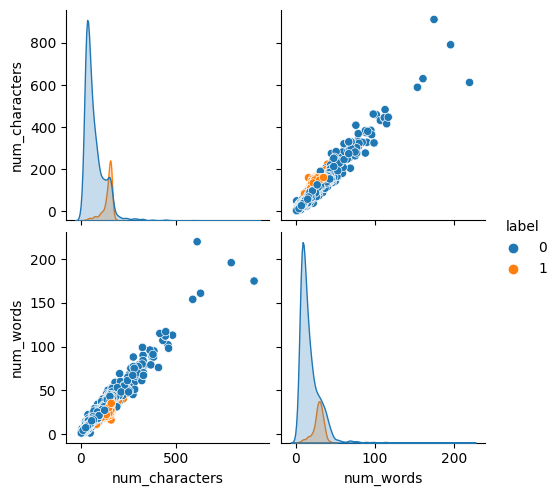

In [214]:
sns.pairplot(df,hue='label')

<ipython-input-215-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

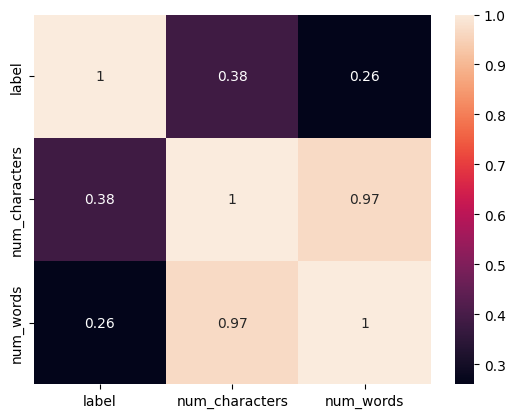

In [215]:
sns.heatmap(df.corr(),annot=True)

**3.Data Preprocessing**

*   Lower case
*   Tokenization
*   Removing speacial characters
*   Removing stop words and pactuation
*   Stemming





** Creating a function with the name of "text"**

In [216]:
def transform_sms(sms):
  sms = sms.lower()
  sms=nltk.word_tokenize(sms)


  y=[]
  for i in sms:
    if i.isalnum():
      y.append(i)

      sms=y[:]
      y.clear()
      for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

      sms=y[:]
      y.clear()

      for i in sms:
        y.append(ps.stem(i))

        return " ".join(y)





1.   Lower case
2.   Tokenization
3. Removing Special characters





The Natural Language Toolkit (NLTK) is an open source Python library
for Natural Language Processing.  A free online book is available.
(If you use the library for academic research, please cite the book.)

Steven Bird, Ewan Klein, and Edward Loper (2009).
Natural Language Processing with Python.  O'Reilly Media Inc.
https://www.nltk.org/book/

isort:skip_file

@version: 3.8.1

*   Stopwords




In [217]:
#transform_sms('I love the YT lectures on Data Science. How about you?')

In [218]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [219]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each



*   For Punctuation Marks




In [220]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'



*   Removing stop words and pactuation



In [221]:
#transform_sms('Did you like my presentation on')

In [222]:
df['sms'][200]

'Found it, ENC  &lt;#&gt; , where you at?\n'

In [223]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')
ps.stem('Reading')

'read'

In [224]:
df['transformed_sms']=df['sms'].apply(transform_sms)

In [225]:
df.head()

,sms,label,num_characters,num_words,num_senteces,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,"[Go until jurong point, crazy.., Available onl...",go
1,Ok lar... Joking wif u oni...\n,0,30,8,"[Ok lar..., Joking wif u oni...]",ok
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free
3,U dun say so early hor... U c already then say...,0,50,13,[U dun say so early hor... U c already then sa...,u
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,"[Nah I don't think he goes to usf, he lives ar...",nah


**WordCloud**

In [226]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [227]:
wc.generate(df[df['label']== 1]['transformed_sms'].str.cat(sep=" "))

In [228]:
spam_wc=wc.generate(df[df['label']== 1]['transformed_sms'].str.cat(sep=" "))

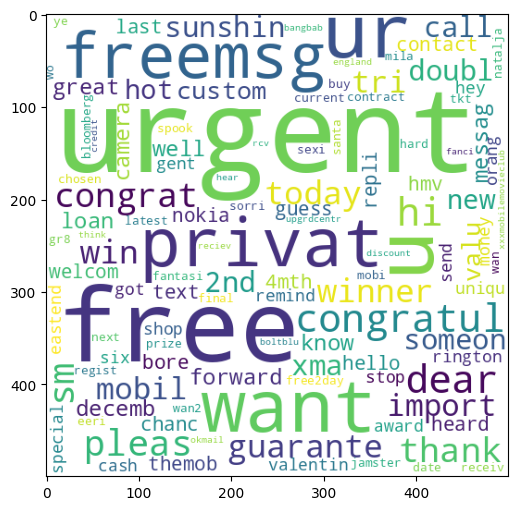

In [229]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [230]:
ham_wc=wc.generate(df[df['label']== 0]['transformed_sms'].str.cat(sep=" "))


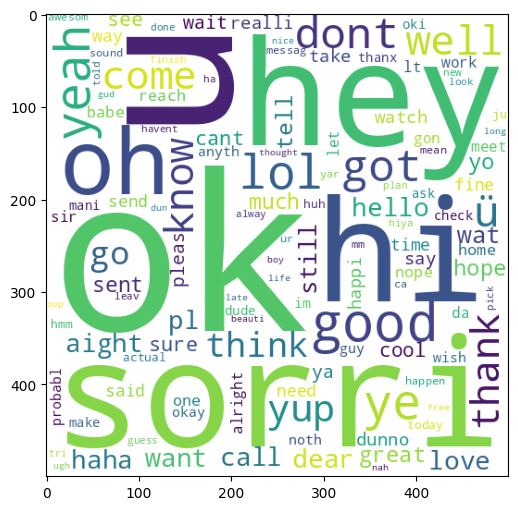

In [231]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [232]:
df.head()

,sms,label,num_characters,num_words,num_senteces,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,"[Go until jurong point, crazy.., Available onl...",go
1,Ok lar... Joking wif u oni...\n,0,30,8,"[Ok lar..., Joking wif u oni...]",ok
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free
3,U dun say so early hor... U c already then say...,0,50,13,[U dun say so early hor... U c already then sa...,u
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,"[Nah I don't think he goes to usf, he lives ar...",nah


In [ ]:
for msg in df[df['label']==1]['transformed_sms'].tolist():
  print(msg)

In [234]:
spam_corpus=[]
for msg in df[df['label']==1]['transformed_sms'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [235]:
len(spam_corpus)

747

In [236]:
from collections  import Counter
import seaborn as sns
pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

(0        urgent
 1          free
 2             u
 3            ur
 4          want
 5        privat
 6       freemsg
 7     congratul
 8          dear
 9            hi
 10           sm
 11        pleas
 12          get
 13            1
 14        thank
 15      congrat
 16       winner
 17        today
 18     guarante
 19          win
 20        mobil
 21          tri
 22       import
 23      sunshin
 24         call
 25          xma
 26        doubl
 27       someon
 28          2nd
 29          new
 Name: 0, dtype: object,
 0     54
 1     39
 2     24
 3     20
 4     19
 5     16
 6     14
 7     13
 8     13
 9     13
 10    11
 11    11
 12    11
 13    11
 14    10
 15    10
 16     9
 17     9
 18     9
 19     9
 20     8
 21     8
 22     8
 23     7
 24     7
 25     7
 26     7
 27     7
 28     7
 29     6
 Name: 1, dtype: int64)

import pandas as pd
from collections import Counter
import seaborn as sns

spam_emails =[]  # Replace [...] with your spam email dataset

spam_words = []
for email in spam_emails:
    spam_words.extend(email.split())

word_counts = Counter(spam_words)
top_30_words = word_counts.most_common(30)
df = pd.DataFrame(top_30_words, columns=['Word', 'Count'])

sns.barplot(data=df, x='Word', y='Count')


**4.Model Building**

In [237]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [238]:
def fit_transform(raw_documents, y=None):
  X=cv.fit_transform(df['transformed_sms']).toarray()